In [70]:
import calendar

In [71]:
import iris

In [72]:
import mule

In [73]:
import numpy as np

In [74]:
import os

In [75]:
from mule.stashmaster import STASHmaster

In [76]:
ozone_1850_file = '/g/data/p66/txz599/data/ancil/CMIP6/ozone_1850_ESM1_v2.anc'

In [77]:
ozone_2014_2101_ssp585_file = '/g/data/p66/txz599/data/ancil/CMIP6/ozone_2014_2101_ssp585_ESM1.anc' 

In [78]:
os.environ["UMDIR"] = "/g/data/access/umdir"

In [79]:
sm = mule.STASHmaster.from_version("7.3")

In [80]:
ff_1850 = mule.AncilFile.from_file(ozone_1850_file, stashmaster=sm)

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/lib/python3.11/site-packages/mule/validators.py:198: UserWarning: 
File: /g/data/p66/txz599/data/ancil/CMIP6/ozone_1850_ESM1_v2.anc
Ancillary file contains header components other than the row/column dependent constants - these should be set to "None" for Ancillary files
  warnings.warn(msg)


In [69]:
# Should not be included in an ancillary file. Flagged by mule validation.
ff_1850.level_dependent_constants = None

In [81]:
ff_ssp = mule.AncilFile.from_file(ozone_2014_2101_ssp585_file, stashmaster=sm)

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/lib/python3.11/site-packages/mule/validators.py:198: UserWarning: 
File: /g/data/p66/txz599/data/ancil/CMIP6/ozone_2014_2101_ssp585_ESM1.anc
Ancillary file contains header components other than the row/column dependent constants - these should be set to "None" for Ancillary files
  warnings.warn(msg)


In [ ]:
# Should not be included in an ancillary file. Flagged by mule validation.
ff_ssp.level_dependent_constants = None

In [58]:
# Fix the date and time in the fixed length header
ff_1850.fixed_length_header.t1_year = 1850
ff_1850.fixed_length_header.t2_year = 1850
ff_1850.fixed_length_header.t2_hour = 0

In [61]:
# fix the year and month in each field
for field in ff_1850.fields:
    field.lbyr = 1850
    field.lbdatd = calendar.monthrange(field.lbyr, field.lbmon)[1]

In [62]:
ozone_1850_fixed_file = '/scratch/tm70/pcl851/tmp/ozone_1850_fixed.anc'

In [64]:
ff_1850.to_file(ozone_1850_fixed_file)

In [84]:
cube_1850 = iris.load_cube(ozone_1850_fixed_file)

In [85]:
cube_1850

Mass Fraction Of Ozone In Air (1),time,model_level_number,latitude,longitude
Shape,12,38,145,1
Dimension coordinates,,,,
time,x,-,-,-
model_level_number,-,x,-,-
latitude,-,-,x,-
longitude,-,-,-,x
Auxiliary coordinates,,,,
level_height,-,x,-,-
sigma,-,x,-,-
Scalar coordinates,,,,


In [87]:
cube_ssp = iris.load_cube(ozone_2014_2101_ssp585_file)

In [88]:
cube_ssp

Mass Fraction Of Ozone In Air (1),time,model_level_number,latitude,longitude
Shape,1056,38,145,1
Dimension coordinates,,,,
time,x,-,-,-
model_level_number,-,x,-,-
latitude,-,-,x,-
longitude,-,-,-,x
Auxiliary coordinates,,,,
level_height,-,x,-,-
sigma,-,x,-,-
Scalar coordinates,,,,


In [89]:
import cftime

In [93]:
t1 = cftime.DatetimeGregorian(1850,12,1)
t2 = cftime.DatetimeGregorian(1850,12,31)
constraint_dec = iris.Constraint(time=lambda cell: t1 <= cell.point <= t2)

In [94]:
cube_1850_dec = cube_1850.extract(constraint_dec)

In [95]:
cube_1850_dec

<iris 'Cube' of mass_fraction_of_ozone_in_air / (1) (model_level_number: 38; latitude: 145; longitude: 1)>

In [96]:
import matplotlib.pyplot as plt
import iris.quickplot as qplt

In [101]:
iris.FUTURE.date_microseconds = True

In [103]:
cube=cube_1850_dec.collapsed('longitude', aggregator=iris.analysis.MEAN)

In [104]:
cube

<iris 'Cube' of mass_fraction_of_ozone_in_air / (1) (model_level_number: 38; latitude: 145)>

In [106]:
cube.units

Unit('1')

In [107]:
cube.long_name

In [108]:
cube

<iris 'Cube' of mass_fraction_of_ozone_in_air / (1) (model_level_number: 38; latitude: 145)>

In [111]:
cube.attributes.locals

{'source': 'Data from Met Office Unified Model',
 'um_version': '7.3',
 'STASH': STASH(model=1, section=0, item=60)}

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/lib/python3.11/site-packages/iris/coords.py:1982: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/lib/python3.11/site-packages/iris/coords.py:1982: IrisGuessBoundsWarning: Coordinate 'model_level_number' is not bounded, guessing contiguous bounds.
  warnings.warn(


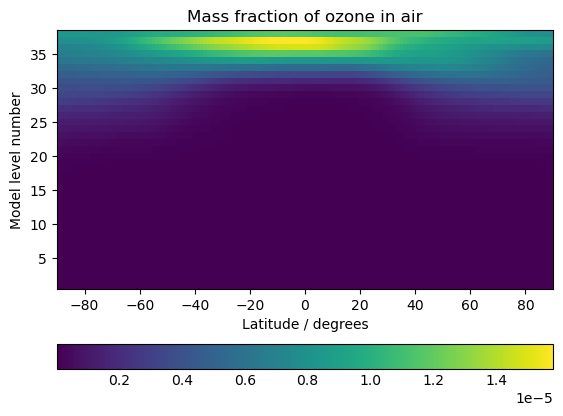

In [105]:
qplt.pcolormesh(cube)